<h1><b>Classification of Bank Payment Defaults</b></h1>
<h5>Name : Tang Jia Yi
</br>Class : DAAA/FT/2A/04
</br>Admin No. : 2214465</h5>

<hr>


<h5><b>The objectives of this assignment are to:</b></h5>
<ol>
<li>Explore the given dataset,<i> credit_dataset.csv</i>, and try to gain insights from it.</li>
<li>Build a classification model to predict whether a customer will default payment in the next month, in order to better manage risk for a bank.</li>
</ol>

<h5><b>Background Info:</b></h5>
A bank has collected data on it's customers, such as their age, gender, level of education, credit limit, payment and bill history. From this data, the bank would like to predict if a customer would default on their bill in the upcoming month, in a attempt to mitigate risk taken. If a customer is predicted to default on their bill, the bank can take action to mitigate the risk, such as reducing the credit limit of the customer, or contacting the customer to remind them to pay their bill.

<h5><b>Additional Info:</b></h5>
A default is a missed or multiple missed payments on money that you have borrowed. An example of a default would be not paying your credit card bill or your monthly mortgage payment. (Investopedia, 2023)

Potential Reasons for Defaulting:
<ol>
<li>Customer does not have high income, does not have money to repay</li>
<li>Customer overspends and does not have money to repay</li>
<li>Customer has means to repay but forgets to repay</li>
</ol>

</br>
<hr>
<h3>Importing Libraries</h3>
<hr></hr>

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLEARN Libraries
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, RobustScaler

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV,
    learning_curve,
    StratifiedKFold,
)
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, accuracy_score, f1_score

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

# IMBLEARN
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Pickle
import pickle

In [2]:
# Establish a consistent random seed for reproducibility
random_state = 32

In [3]:
# Settings for seaborn
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set("paper", font_scale=1.5)
plt.rcParams['axes.titlepad'] = 20
sns.set(font="Century Gothic")

<hr></hr>
<h3>Loading Dataset</h3>
<hr></hr>

In [4]:
# Loading dataset
df = pd.read_csv('./Data/credit_dataset.csv', index_col=0)

# Inspect the dataset
df.head()

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
Customer ID,,,,,,,,,,,,
1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


<hr></hr>
<h3>Exploratory Data Analysis</h3>
<hr></hr>

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of the characteristics of the dataset. However, we will mainly be focusing on how each feature relates to the target variable as predicting the target is our focus. This is also important so we can know how to proceed with feature engineering.

This is a dataset collected from a bank, and it contains 1600 data points with 12 columns.

<ul>
<li><b>Credit Limit:</b> The credit limit for the customer</li>
<li><b>Gender:</b> Customer gender</li>
<li><b>Education:</b> Customer education level</li>
<li><b>Marriage Status:</b> Customer marital status</li>
<li><b>Age:</b> Customer age</li>
<li><b>Bill_Amount 1-3:</b> Customer credit card bill amount 1-3 months ago</li>
<li><b>Pay_Amount 1-3:</b> The amount customer paid 1-3 months ago</li>
<li><b>Default payment next month:</b> Whether a customer defaults their credit card payment. 1 means they default, 0 means they dont. This is also the target variable.</li>
<ul>



<h4>Descriptive Statistics</h4>

We analyse summary statistics of the dataset to gain a better understanding of the data.

In [5]:
# Shape of the dataset
df.shape

(1600, 12)

In [6]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1 to 1600
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Credit Limit                1600 non-null   int64 
 1   Gender                      1600 non-null   object
 2   Education                   1600 non-null   object
 3   Marriage Status             1600 non-null   object
 4   Age                         1600 non-null   int64 
 5   Bill_Amount1                1600 non-null   int64 
 6   Bill_Amount2                1600 non-null   int64 
 7   Bill_Amount3                1600 non-null   int64 
 8   Pay_Amount1                 1600 non-null   int64 
 9   Pay_Amount2                 1600 non-null   int64 
 10  Pay_Amount3                 1600 non-null   int64 
 11  Default payment next month  1600 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 162.5+ KB


In [7]:
# Get number of null values in each column
df.isnull().sum()

Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64

<b>Observations</b>

<ul>
<li>The shape of the dataset is (1600,9) whereby there is 1600 observations and 12 columns. There are 11 features and 1 target variable (Default payment next month).</li>
<li>Datatypes of all columns are numerical except Gender, Education, and Marriage Status</li>
<li>There appears to be no missing values in the dataset.</li>
</ul>

<h4>Univariate Analysis</h4>

We will begin with a univariate analysis, analysing the distribution of each variable.

<h5>Distribution of numerical features</h5>

We will plot and see the distribution of the different numerical variables and how it relates to default of payments. To do this, we have a function to plot a distribution plot.

In [8]:
# Function to plot the distribution of a numerical feature

def plot_distribution(df, col):
    
    # Figure size
    plt.figure(figsize=(12,7))
    
    # Plots
    plt.hist(
        df[df["Default payment next month"] == 1][col],
        density=True,
        bins=50,
        color="#ff000088",
    )
    plt.hist(
        df[df["Default payment next month"] == 0][col],
        density=True,
        bins=50,
        color="#0000ff88",
    )
    sns.kdeplot(df[df["Default payment next month"] == 1][col], lw=3, color="#ff0000")
    sns.kdeplot(df[df["Default payment next month"] == 0][col], lw=3, color="#0000ff")
    
    # Legend
    plt.legend(
        labels=["1", "0"],
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        fancybox=True,
        shadow=True,
        ncol=3,
    )
    
    # Title
    plt.title("Distribution of " + col)
    
    # Show Plot
    plt.show()


Credit Limit </br>

Distribution of credit limit appears to be right skewed. Other than that, credit limit does not appear to have a noticeable impact on whether a customer will default.


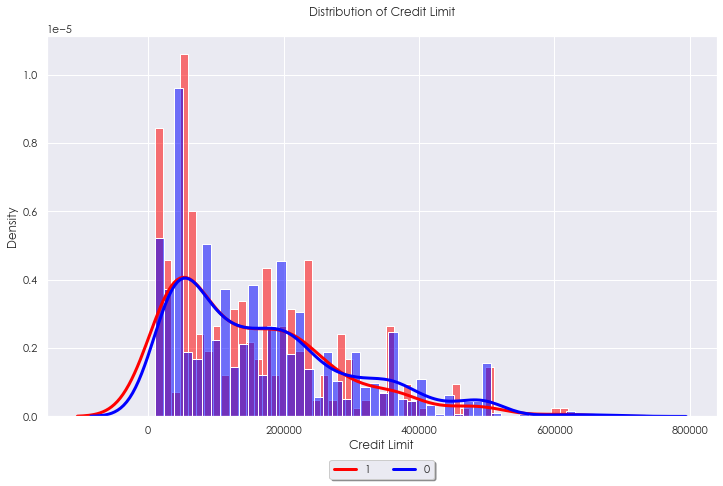

In [9]:
plot_distribution(df, "Credit Limit")

Age </br>

The distribution of age appears to be right skewed. We observe that those aged 30-40 are less likely to default while those aged 50-60 are more likely to default.


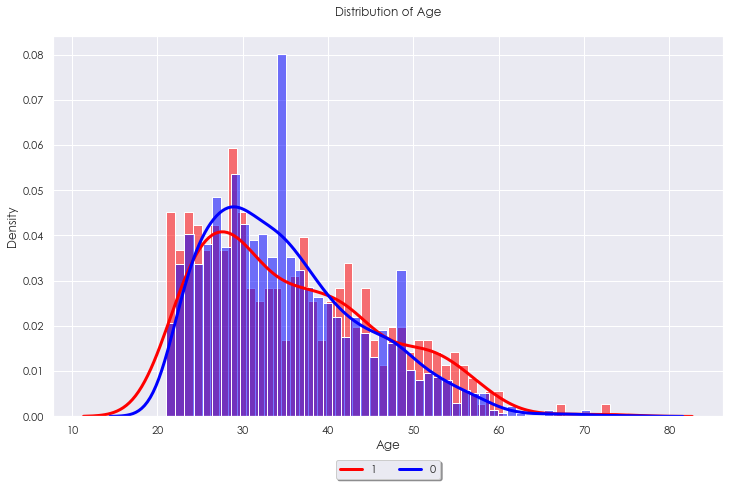

In [10]:
plot_distribution(df, "Age")

Bill Amount </br>

We see that the distribution of bill amounts are all right skewed. However, we can also see that more people pay their bills than default their bills.


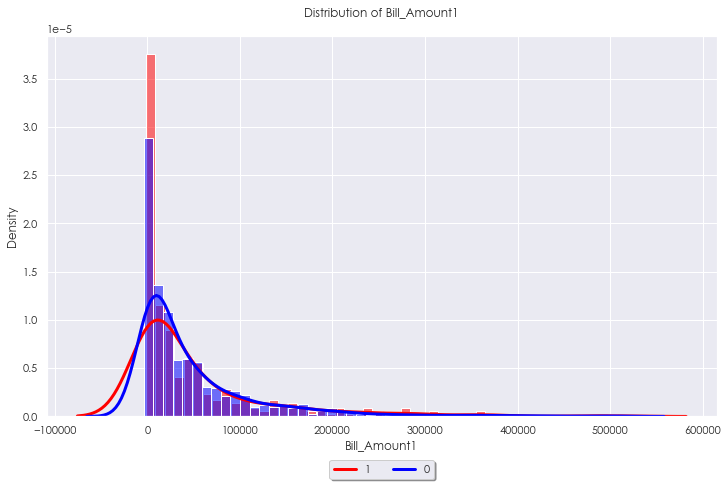

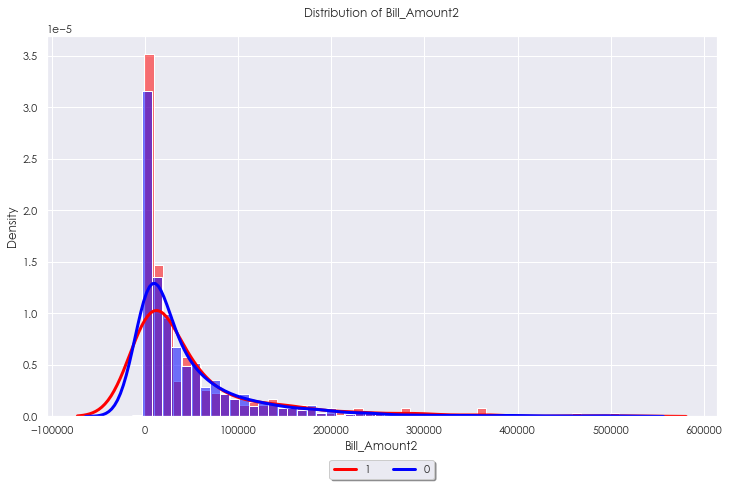

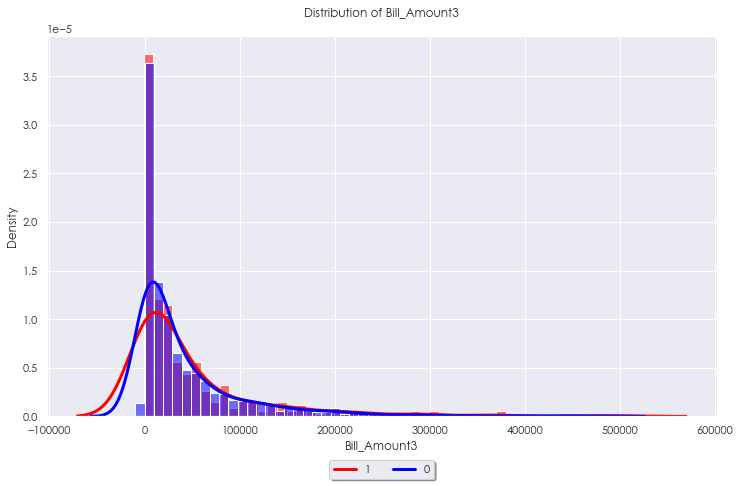

In [11]:
plot_distribution(df, "Bill_Amount1")
plot_distribution(df, "Bill_Amount2")
plot_distribution(df, "Bill_Amount3")

Pay Amount </br>

We see that the distribution of pay amounts are all right skewed as well. However, we can also see that those who pay less are more likely to default their bills.


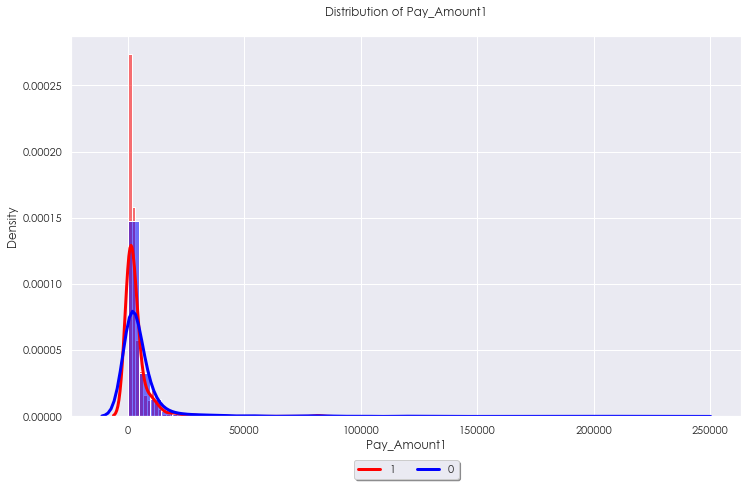

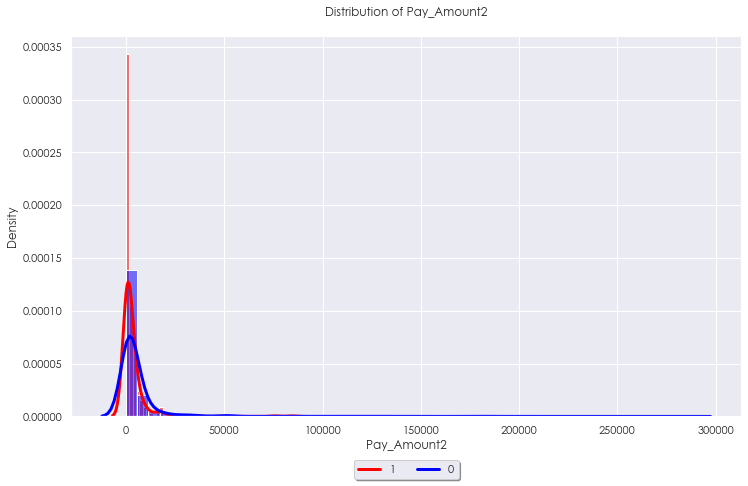

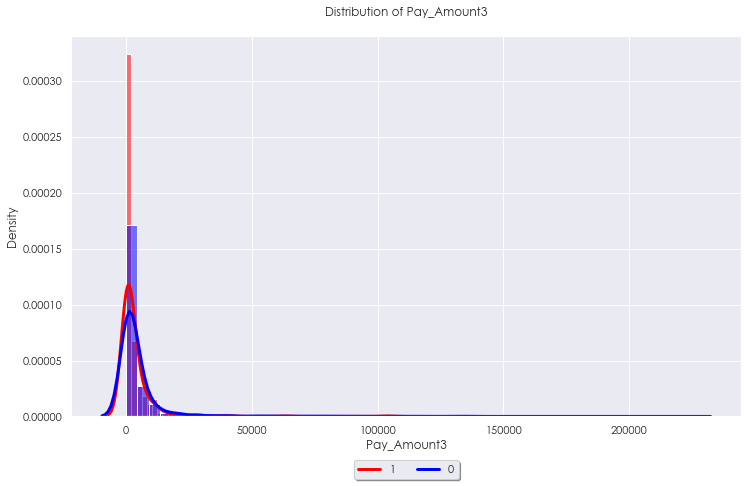

In [12]:
plot_distribution(df, "Pay_Amount1")
plot_distribution(df, "Pay_Amount2")
plot_distribution(df, "Pay_Amount3")

<h5>Distribution of categorical features</h5>

We will plot and see the distribution of the different categorical variables and how it relates to default of payments. To do this, we have a function to plot a count plot.

In [13]:
# Function to plot the countplot of a categorical feature

def plot_countplot(df, col):
    
    # Figure size
    plt.figure(figsize=(12,7))
    
    # Plot
    sns.countplot(x=col, hue="Default payment next month", data=df, palette=["#0000ff88", "#ff000088" ])
    
    # Legend
    plt.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        fancybox=True,
        shadow=True,
        ncol=3,
    )
    
    # Title
    plt.title("Countplot of " + col)
    plt.xlabel('')
    
    # Show Plot
    plt.show()


Gender </br>

We see that the female customers are slightly more likely to default on their loans.


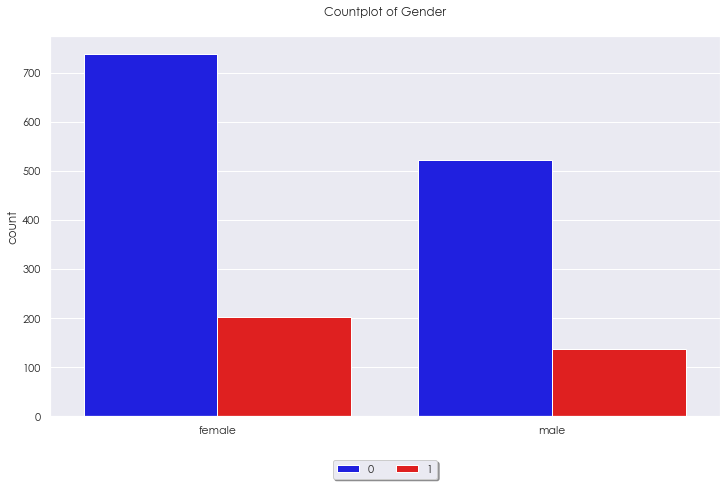

In [14]:
plot_countplot(df, 'Gender')

Education </br>

We see that there is no significant difference in the ratio of customers who default their loans to the people who do not default for different education levels. However, it seems thatthose with high school education are more likely to default.


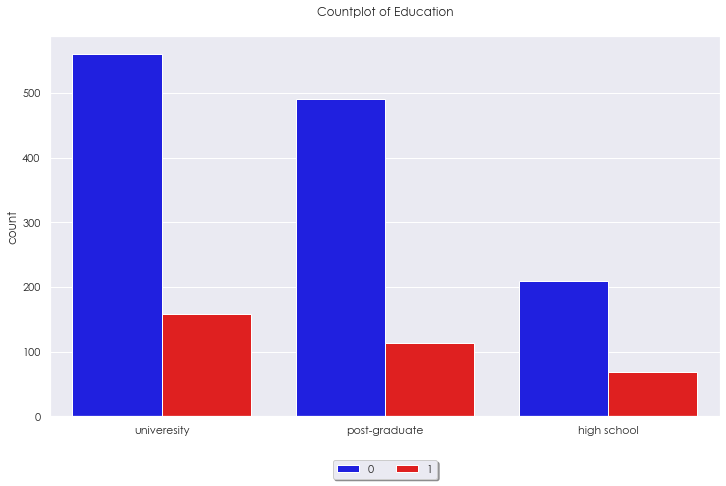

In [15]:
plot_countplot(df, 'Education')

Marriage Status </br>

We see that singles are less likely to default their loans while married customers are more likely to default their loans.


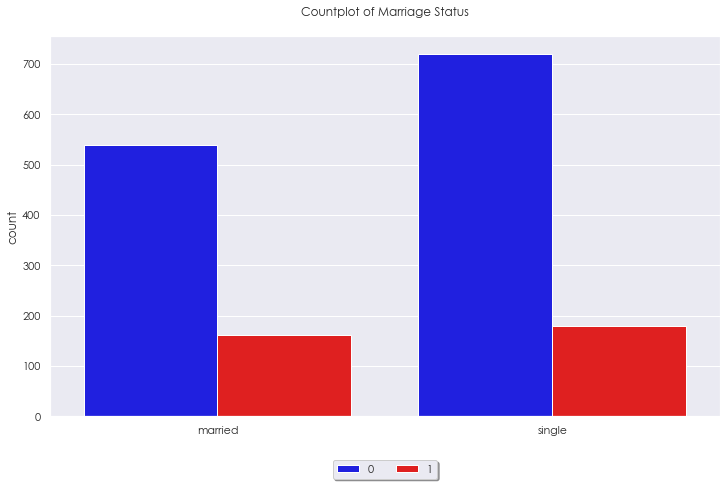

In [16]:
plot_countplot(df, 'Marriage Status')

<b>Observations</b>

Numerical features:
<ul>
<li>The numerical features are all right skewed, likely because real world distribution of wealth is similarly right skewed with</li>
<li>There are no extremely clear trends between the features and the target variable.</li>
<li>There are some negative values for bill amounts, which is probably because the customer has overpaid their bill in previous months, and has had the balance carried forward to the next month. These people who have negative bill amounts tend to be people who do not default.</li>
</ul>


Catetgorical features:
<ul>
<li>Gender and Education seems to have a small effect on whether a customer will default.</li>
<li>Marriage Status seems to have a bigger effect, with single people less likely to default.</li>
</ul>


<h5>Bivariate Analysis</h5>

We will now analyse the relationships between the different variables.

<h5>Pearson's r Correlations</h5>

To check for correlation between the features and target, we will make use Pearson's r correlation coefficient. We will plot a heatmap to visualise the correlation between the different variables.

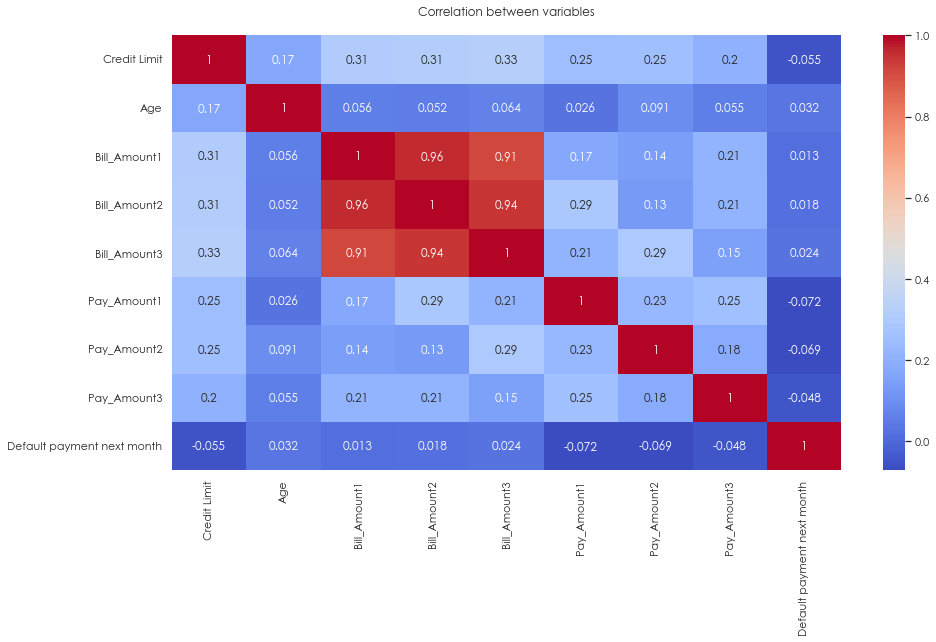

In [17]:
# Figure size
plt.figure(figsize=(15, 8))

# Plot
sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set(title="Correlation between variables")

# Show Plot
plt.show()

<h5>Pairplot</h5>

Since our feature space is not extremely large, we can afford to plot out a Pairplot to visualise the distribution of data points with relation to our target variable.

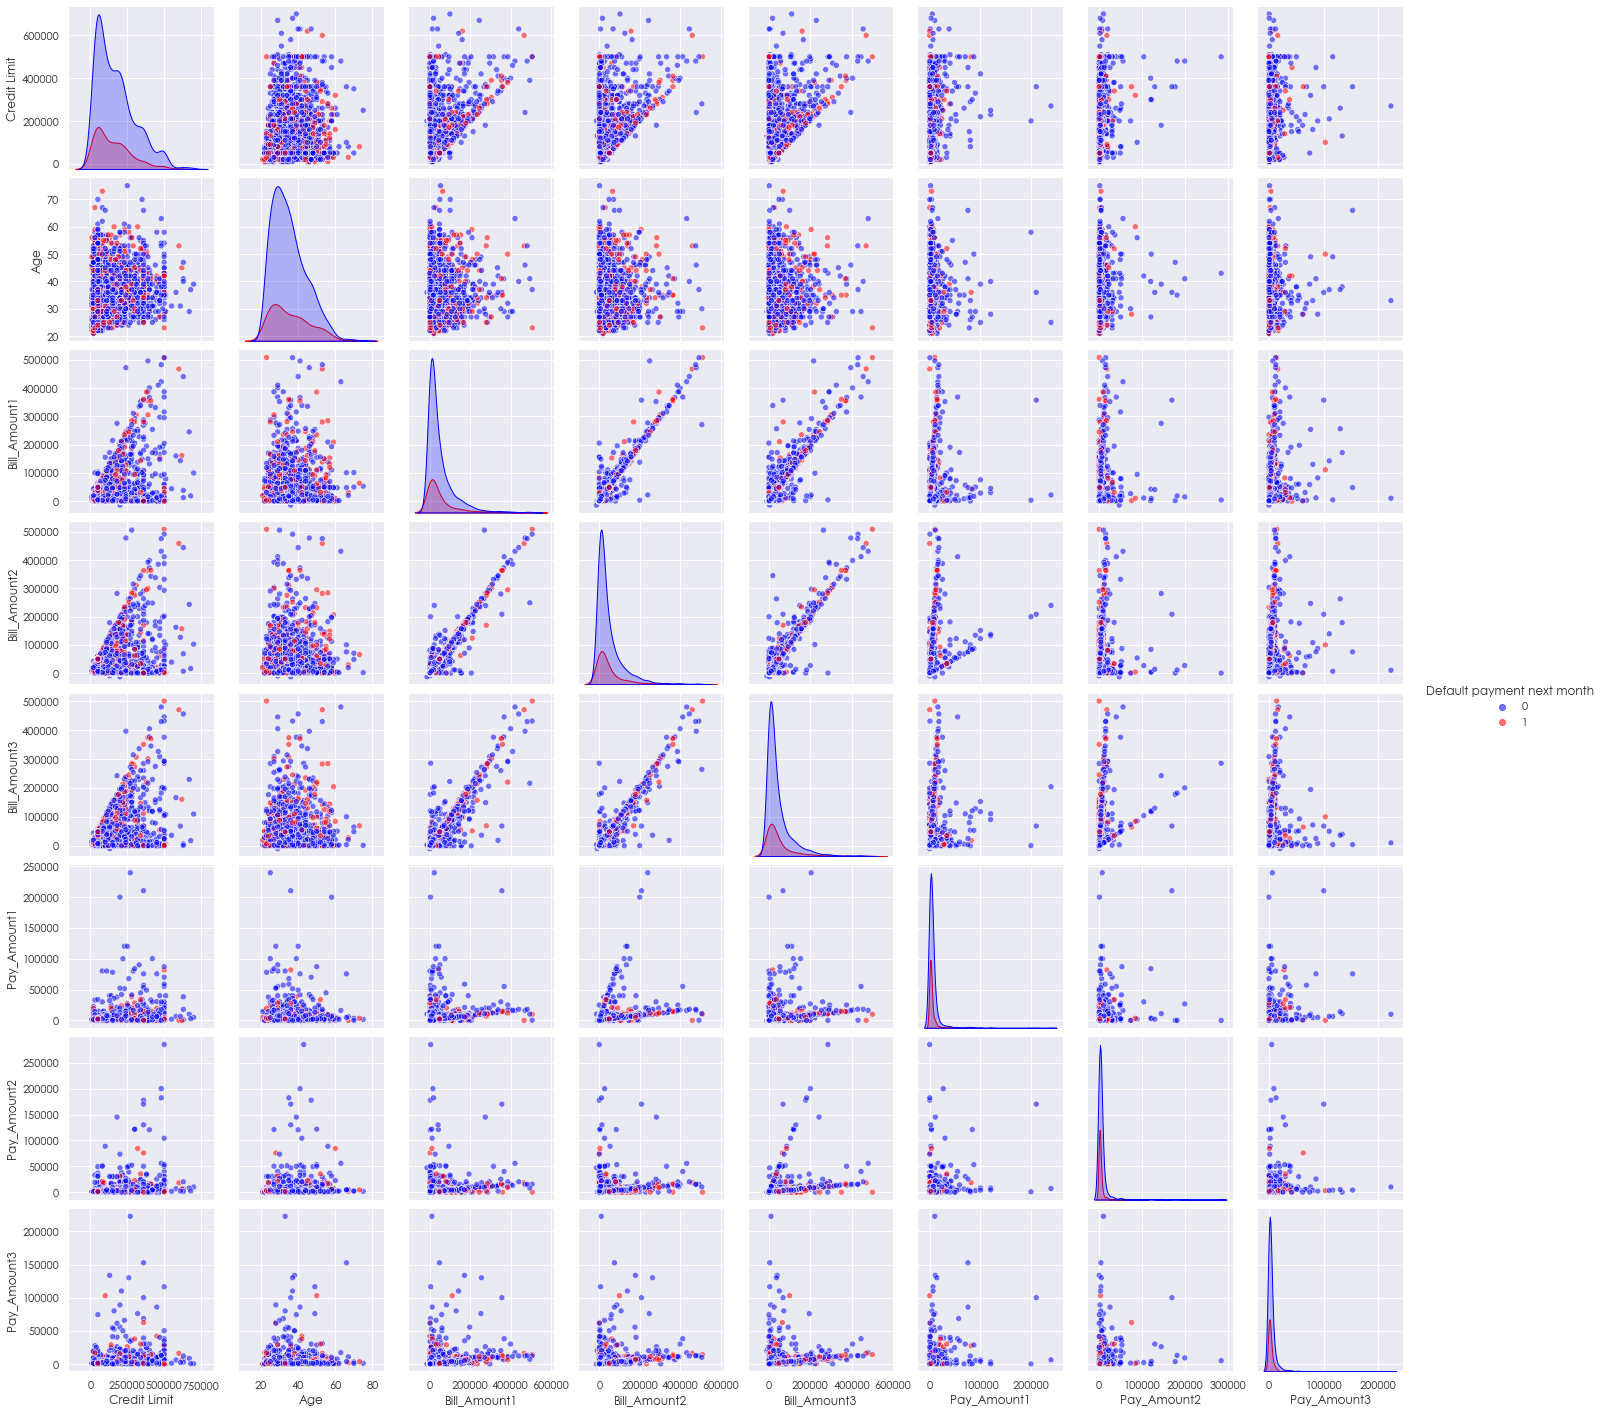

In [18]:
sns.pairplot(df, hue="Default payment next month", palette=["#0000ff88", "#ff000088" ])
plt.show()

<b>Observations</b>

<ul>
<li>There is an extremely high correlation between all of the bill amount features, which is likely because monthly spending habits of a customer is likely to not change very easily.</li>
<li>Other than that, there are no features with extremely high correlation.</li>
</ul>


<hr></hr>
<h3>Data Preperation</h3>
<hr></hr>

Before we can train a machine learning algorithm on our data, we first need to prepare our data.

We seperate our target and features into X and y respectively.

In [19]:
X, y = df.drop("Default payment next month", axis=1), df["Default payment next month"]

<h4>Splitting Data points</h4>

To evaluate our final chosen models, we will leave a small independent test set to report on the final performance of our classifiers. When building the hold out set, we use stratify to ensure that the distribution of classes is the same in both the independent set and the training set.

We also generate a copy of the training data so we can visualise the data preprocessing and feature engineering without affecting our actual train dataset.

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=random_state
)

# Copy the training data 
X_training = X_train.copy()

In [21]:
# Verify split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1280, 11)
X_test shape: (320, 11)


<hr></hr>
<h3>Data Preprocessing and Feature Engineering</h3>
<hr></hr>

After EDA, we can see that we have no missing data in our dataset. Hence, there will be no need for us to impute missing values. We will now try to visualise what our data preprocessing pipeline will look like by showing our preprocessing steps for the numerical and categorical features.



<h4>Feature Engineering</h4>

To increase the model performance, we will be creating new features from the existing features. 

The features we will be creating are:
<ol>
<li>Amount overdue for each month (given by Pay_Amount-Bill_Amount)</li>
<li>Average bill amount for the past 3 months</li>
<li>Average bill to credit limit ratio</li>
</ol>

We also drop our original bill amount columns as they are highly correlated with each other.

In [22]:
# Amount overdue 1 month ago
X_training["Amount_Overdue1"] = X_training["Bill_Amount1"] - X_training["Pay_Amount1"]

# Amount overdue 2 months ago
X_training["Amount_Overdue2"] = X_training["Bill_Amount2"] - X_training["Pay_Amount2"]

# Amount overdue 3 months ago
X_training["Amount_Overdue3"] = X_training["Bill_Amount3"] - X_training["Pay_Amount3"]

# Average bill amount
X_training["Average_Bill_Amount"] = (
    X_training["Bill_Amount1"]
    + X_training["Bill_Amount2"]
    + X_training["Bill_Amount3"]
) / 3

# Average bill to credit limit ratio
X_training["Bill_To_Credit"] = ( 
    (X_training["Bill_Amount1"] 
     + X_training["Bill_Amount2"] 
     + X_training["Bill_Amount3"] ) 
    / (X_training["Credit Limit"]*3)
)
    
# Drop the original bill amount columns as they are highly correlated
X_training.drop(
    ["Bill_Amount1", "Bill_Amount2", "Bill_Amount3"], axis=1, inplace=True   
)
    
# Verify new features
X_training.head()

,Credit Limit,Gender,Education,Marriage Status,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,Amount_Overdue1,Amount_Overdue2,Amount_Overdue3,Average_Bill_Amount,Bill_To_Credit
Customer ID,,,,,,,,,,,,,
66,200000,male,post-graduate,married,57,0,0,8222,152519,148751,135854,148448.666667,0.742243
1250,350000,female,post-graduate,married,52,0,0,0,2400,2400,2400,2400.000000,0.006857
1060,20000,male,high school,married,33,2191,1000,0,18309,15237,20960,19232.333333,0.961617
1162,230000,female,univeresity,married,44,1677,2920,2683,4313,-1243,237,3529.000000,0.015343
913,140000,female,high school,married,46,3000,3000,3000,65075,66972,68805,69950.666667,0.499648


<h4>Categorical Encoding</h4>

Our dataset contains categorical values which is hard for our model to train on, we have to encode the data. We will be using OneHotEncoder as pd.get_dummies() is hard to implement into pipeline and our categorical data, Education, Marital Status, and Gender are all not ordinal.

In [23]:
# Encoder
enc = OneHotEncoder()

# Declare categorical columns
cat_cols = [
    "Gender",
    "Education",
    "Marriage Status"
]

for col in cat_cols:
    # Fit the encoder
    enc.fit(X_training[[col]])
    
    # Transform and add new columns
    X_training = pd.concat(
        [
            X_training,
            pd.DataFrame(
                enc.transform(X_training[[col]]).toarray(),
                columns=enc.get_feature_names_out([col]),
                index=X_training.index,
            ),
        ],
        axis=1,
    )
    
    # Drop old column
    X_training.drop(col, axis=1, inplace=True)
    
# Verify new columns
X_training.head()

,Credit Limit,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,Amount_Overdue1,Amount_Overdue2,Amount_Overdue3,Average_Bill_Amount,Bill_To_Credit,Gender_female,Gender_male,Education_high school,Education_post-graduate,Education_univeresity,Marriage Status_married,Marriage Status_single
Customer ID,,,,,,,,,,,,,,,,,
66,200000,57,0,0,8222,152519,148751,135854,148448.666667,0.742243,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1250,350000,52,0,0,0,2400,2400,2400,2400.000000,0.006857,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1060,20000,33,2191,1000,0,18309,15237,20960,19232.333333,0.961617,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1162,230000,44,1677,2920,2683,4313,-1243,237,3529.000000,0.015343,1.0,0.0,0.0,0.0,1.0,1.0,0.0
913,140000,46,3000,3000,3000,65075,66972,68805,69950.666667,0.499648,1.0,0.0,1.0,0.0,0.0,1.0,0.0


<h4>Standardization</h4>

We will be using RobustScaler to scale the data as the data we have is right skewed. RobustScaler is less prone to outliers as it uses the median and quartiles instead of mean and standard deviation.

In [24]:
# Robust Scaler
scaler = RobustScaler()

# Declare numeric columns
num_cols = [
    "Credit Limit",
    "Age",
    "Bill_To_Credit",
    "Pay_Amount1",
    "Pay_Amount2",
    "Pay_Amount3",
    "Amount_Overdue1",
    "Amount_Overdue2",
    "Amount_Overdue3",
    "Average_Bill_Amount"
]

# Scale the numerical columns
scaler.fit(X_training[num_cols])

# Transform the training data
X_training[num_cols] = scaler.transform(X_training[num_cols])

# Verify transformation
X_training.head()


,Credit Limit,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,Amount_Overdue1,Amount_Overdue2,Amount_Overdue3,Average_Bill_Amount,Bill_To_Credit,Gender_female,Gender_male,Education_high school,Education_post-graduate,Education_univeresity,Marriage Status_married,Marriage Status_single
Customer ID,,,,,,,,,,,,,,,,,
66,0.333333,1.769231,-0.553380,-0.479214,1.812766,2.297963,2.327895,2.324196,2.300678,0.659286,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1250,1.166667,1.384615,-0.553380,-0.479214,-0.373936,-0.263959,-0.266670,-0.289858,-0.328248,-0.366383,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1060,-0.666667,-0.076923,-0.006860,-0.239607,-0.373936,0.007543,-0.039091,0.073689,-0.025260,0.965254,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1162,0.500000,0.769231,-0.135071,0.220438,0.339628,-0.231312,-0.331255,-0.332227,-0.307926,-0.354547,1.0,0.0,0.0,0.0,1.0,1.0,0.0
913,0.000000,0.923077,0.194936,0.239607,0.423936,0.805649,0.878086,1.010861,0.887687,0.320930,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
X_training

,Credit Limit,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,Amount_Overdue1,Amount_Overdue2,Amount_Overdue3,Average_Bill_Amount,Bill_To_Credit,Gender_female,Gender_male,Education_high school,Education_post-graduate,Education_univeresity,Marriage Status_married,Marriage Status_single
Customer ID,,,,,,,,,,,,,,,,,
66,0.333333,1.769231,-0.553380,-0.479214,1.812766,2.297963,2.327895,2.324196,2.300678,0.659286,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1250,1.166667,1.384615,-0.553380,-0.479214,-0.373936,-0.263959,-0.266670,-0.289858,-0.328248,-0.366383,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1060,-0.666667,-0.076923,-0.006860,-0.239607,-0.373936,0.007543,-0.039091,0.073689,-0.025260,0.965254,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1162,0.500000,0.769231,-0.135071,0.220438,0.339628,-0.231312,-0.331255,-0.332227,-0.307926,-0.354547,1.0,0.0,0.0,0.0,1.0,1.0,0.0
913,0.000000,0.923077,0.194936,0.239607,0.423936,0.805649,0.878086,1.010861,0.887687,0.320930,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,0.055556,0.923077,-0.300698,-0.198874,-0.373936,-0.246040,-0.276173,-0.313951,-0.319446,-0.349084,1.0,0.0,1.0,0.0,0.0,0.0,1.0
321,-0.166667,-0.384615,0.070217,-0.479214,0.157979,0.648420,0.694172,0.640713,0.629778,0.329316,0.0,1.0,0.0,0.0,1.0,0.0,1.0
862,0.666667,0.538462,0.332627,8.826165,4.945213,-0.347002,-0.947138,0.032085,-0.114794,-0.299460,0.0,1.0,0.0,1.0,0.0,1.0,0.0


<h4>Resampling</h4>

Our target value distribution is imbalanced, so we will have to resample our data to balance the distribution. To do this, we will use SMOTE to oversample the minority class.

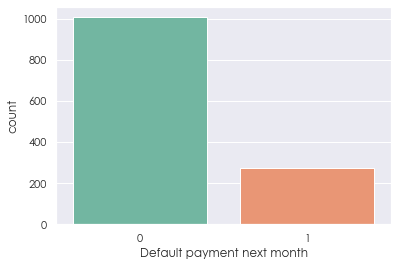

In [26]:
# Plot the distribution of the target label before resampling
sns.countplot(x=y_train, palette="Set2")
plt.show()

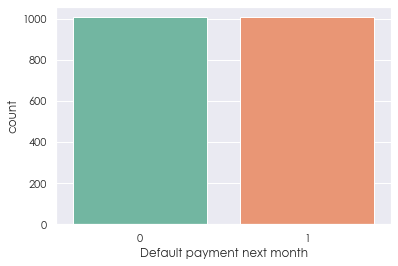

In [27]:
# SMOTE Oversampling
smote = SMOTE(random_state=random_state)

# Fit SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_training, y_train)

# Plot the distribution of the target label after resampling
sns.countplot(x=y_resampled, palette="Set2")
plt.show()


We have now visualised what our data will look like after it goes through the data preprocessing pipeline. Observe that the class imbalance has been addressed, and that new features have been created. The original data has also been altered such that the model is able to process it more effectively.

<hr></hr>
<h3>Model Selection</h3>
<hr></hr>

The plan for model selection is to run the data through some models and deem the best model based on scoring metrics.


<h4>Scoring Metrics</h4>

We will be using 3 metrics to evaluate our model.

<dl>
<dt><b>Accuracy</b></dt>
<dd>We use accuracy as a scoring metric as we have balanced the data and we want to look and what is the % of correct predictions.</dd></br>

<dt><b>F1-Score</b></dt>
<dd>Harmonic mean of recall and precision, it does not care about how many true negatives are being classified.</dd></br>

<dt><b>ROC_AUC</b></dt>
<dd>ROC_AUC also known as Area Under the Receiver Operating Characteristic Curve allow us to range of possibilities for observation(probability) in our classification.</dd></br>
</dl>

F1-Score is going to be our main evaluation metric as in this case we want to reduce both false positives and false negatives. This is because false positives will result in lost money for the bank as money will be lent to those who are unable to pay it back, and false negatives will result in lost customers as the banks are less likely to provide them service as they are incorrectly deemed high risk. 

From a risk management perspective, having a high f-1 score means that the bank is able to lose less money to loan defaults while also avoid losing profitable customers, which means that they avoid any potential loss of profit.

In [28]:
# Scoring metrics
scoring_metrics = ["accuracy","f1", "roc_auc"]

<h4>Pipeline settings</h4>

We use pipelines to prevent data leakage. In our pipeline, we will also define our data preprocessing and feature engineering steps.



In [29]:
# Amount overdue 1 month ago
def Overdue1(df):
    df["Amount_Overdue1"] = df["Bill_Amount1"] - df["Pay_Amount1"]
    return df

# Amount overdue 2 months ago
def Overdue2(df):
    df["Amount_Overdue2"] = df["Bill_Amount2"] - df["Pay_Amount2"]
    return df

# Amount overdue 3 months ago
def Overdue3(df):
    df["Amount_Overdue3"] = df["Bill_Amount3"] - df["Pay_Amount3"]
    return df

# Average bill amount
def Average_Bill_Amount(df):
    df["Average_Bill_Amount"] = (
        df["Bill_Amount1"]
        + df["Bill_Amount2"]
        + df["Bill_Amount3"]
    ) / 3
    return df

# Average bill to credit limit ratio
def Bill_To_Credit(df):
    df["Bill_To_Credit"] = ( 
        (df["Bill_Amount1"] 
         + df["Bill_Amount2"] 
         + df["Bill_Amount3"] ) 
        / (df["Credit Limit"]*3)
    )
    
    # Dropping highly correlated bill columns
    df = df.drop(
        ["Bill_Amount1", "Bill_Amount2", "Bill_Amount3"], axis=1
    )
    return df


# Preprocessing steps
categorical_transformer = Pipeline([("encoder", OneHotEncoder())])

numeric_transformer = Pipeline([("scaler", RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, cat_cols),
        ("numeric", numeric_transformer, num_cols),
    ],
    remainder="passthrough",
)

# Oversampling
smt = SMOTE(random_state=random_state)

# Pipeline steps
steps = [
    ("overdue1", FunctionTransformer(Overdue1)),
    ("overdue2", FunctionTransformer(Overdue2)),
    ("overdue3", FunctionTransformer(Overdue3)),
    ("average_bill_amount", FunctionTransformer(Average_Bill_Amount)),
    ("bill_to_credit", FunctionTransformer(Bill_To_Credit)),
    ("preprocessing", preprocessor),
    ("over", smt),
    ("model"),
]


STEP_LEN = len(steps) - 1

<h4>Checking through different models</h4>

We import some of the important models from the sklearn model and check which model is the best using their default parameters.

We will be using the previously defined scoring metrics to evaluate the models.

In [30]:
# Function to plot learning curves for a model

def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=StratifiedKFold(shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    
    # Get model name
    try:
        model_name = type(model[-1]).__name__
    except:
        model_name = type(model).__name__
        
    # Create plot if ax is not passed
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
        
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    
    # Calculate mean of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    
    # Formatting
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )

    # Setting labels
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax

In [31]:
# Initiate Classifiers with default parameters
models = [
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("Perceptron", Perceptron()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GaussianNB", GaussianNB()),
    ("RidgeClassifier", RidgeClassifier()),
    ("RidgeClassifierCV", RidgeClassifierCV()),
    ("SGDClassifier", SGDClassifier()),
]

In [32]:
# Function to access the performance of the models

def select_model(X_train, y_train, models, scoring):
    
    # Placeholder for the results
    out = []
    
    # Iterate through models
    for name, model in models:
        
        # Create a pipeline with the model and preprocessing steps
        steps[STEP_LEN] = (name, model)
        temp_pipeline = Pipeline(steps=steps)
        plot_learning_curve(
            temp_pipeline,
            X_train,
            y_train,
            scoring="f1",
            ax=ax[models.index((name, model)) % 4, models.index((name, model)) // 4],
        )
        
        # Cross validate the model
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            cv=5,
            return_train_score=True,
        )
        
        # Calculate the average score across all the folds
        out.append(pd.Series(score, name=name).apply(np.mean))

    return pd.DataFrame(out)

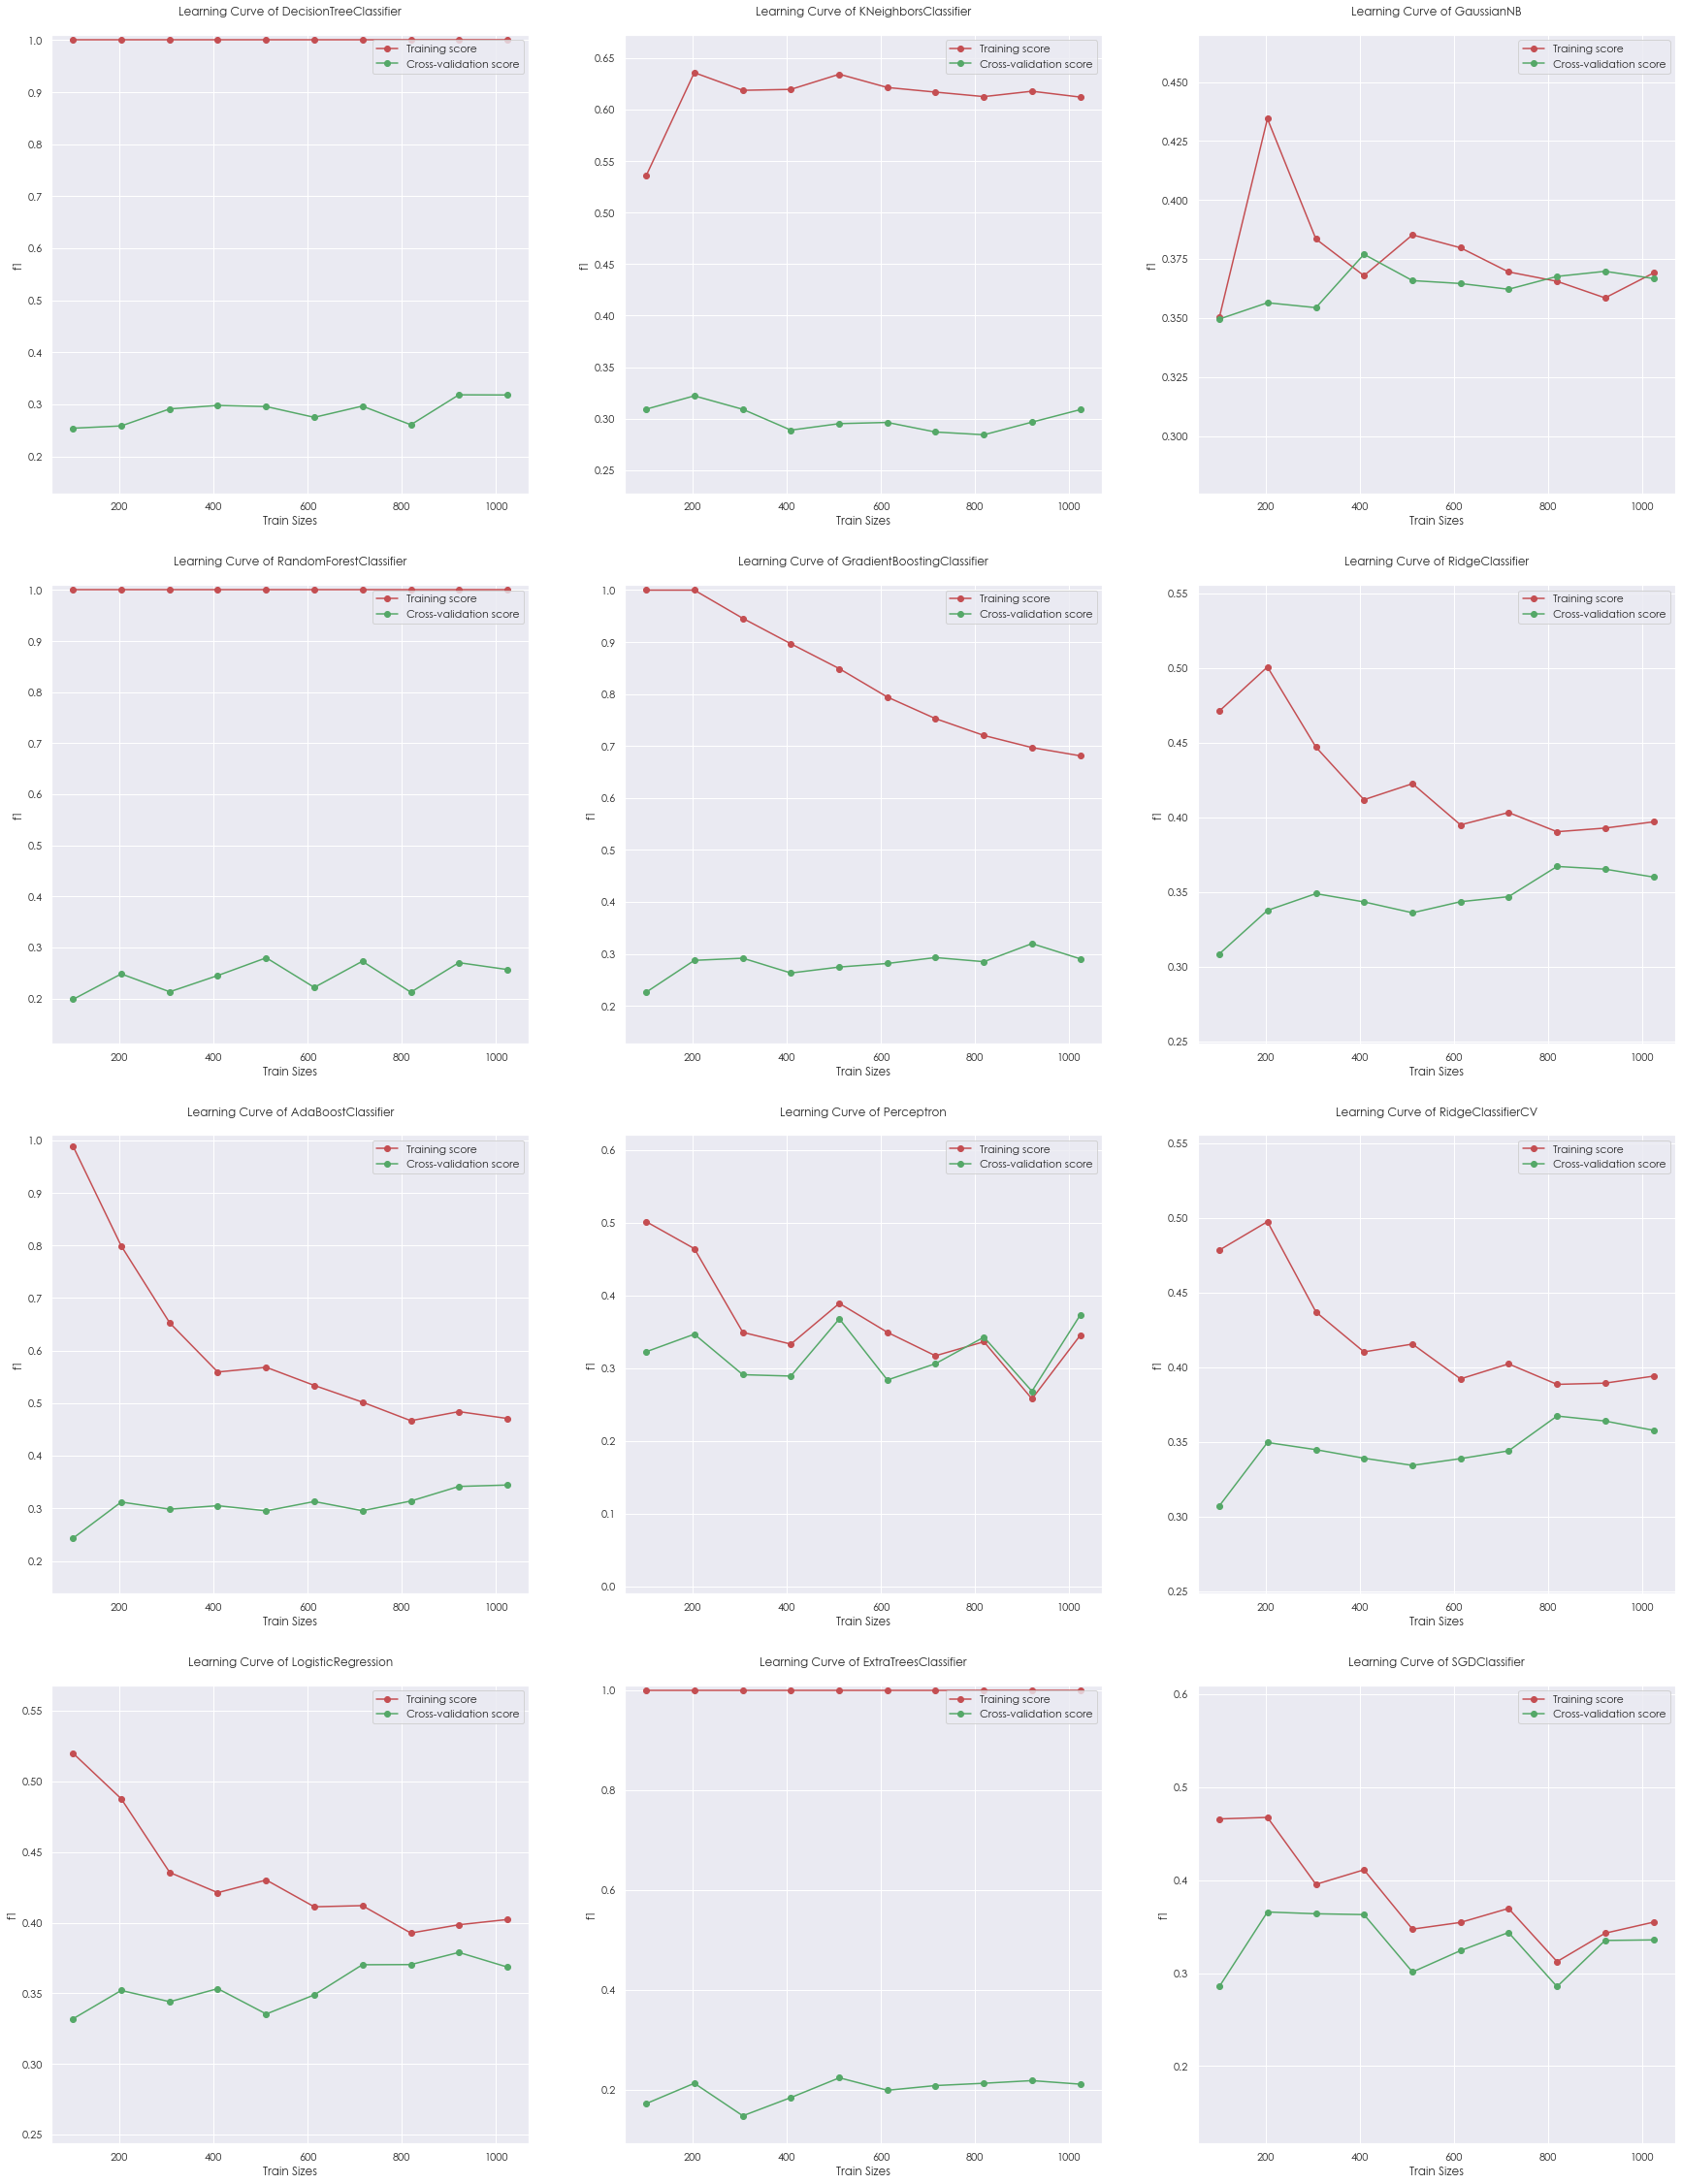

In [33]:
# Comparing the 12 learning curves
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

model_scores = select_model(X_train, y_train, models, scoring_metrics)

In [34]:
# Accessing the scorings
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_roc_auc,train_roc_auc
DecisionTreeClassifier,0.097394,0.043610,0.642188,1.000000,0.301095,1.000000,0.540431,1.000000
RandomForestClassifier,0.872797,0.089019,0.724219,1.000000,0.268816,1.000000,0.596829,1.000000
AdaBoostClassifier,0.465905,0.088820,0.651563,0.714258,0.363746,0.465046,0.617119,0.747610
LogisticRegression,0.102022,0.044611,0.546875,0.568945,0.364666,0.391675,0.620682,0.647827
KNeighborsClassifier,0.085220,0.118427,0.547656,0.748047,0.311715,0.610071,0.524399,0.916015
GradientBoostingClassifier,1.437550,0.055705,0.695312,0.859961,0.327527,0.677843,0.602001,0.906995
Perceptron,0.080018,0.045411,0.552344,0.580273,0.321387,0.348060,0.581001,0.599028
ExtraTreesClassifier,0.470309,0.073014,0.725781,1.000000,0.189011,1.000000,0.546847,1.000000
GaussianNB,0.071215,0.060814,0.326562,0.333594,0.363479,0.370036,0.577082,0.592735
RidgeClassifier,0.042209,0.028207,0.556250,0.570898,0.369306,0.386075,0.615999,0.639587


<b>Observations</b>

We can see that there is no extremely good model that stands out, as they all either suffer from overfitting (where training score is significantly higher than cross-validation score), or have low accuracies and f1-scores which shows that they are underfitted. We will try to tune the hyperparameters of the models to see if we can get better results.

We will only do so for the model that seems to have the most potential (mix of good accuracy, f1-score, and roc_auc). Hence, we will only be tuning the hyperparameters of Gradient Boosting Classifier.

<h4>Tuning Gradient Boosting Classifier</h4>

We can make improvements to the model by tuning the hyperparameters. We will be using GridSearchCV to find the best hyperparameters for our model.

In [35]:
# List of hyper parameters for Gradient Boosting Classifier
list(GradientBoostingClassifier().get_params().keys())

['ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

We can see that there are many possible parameters to tune for the , but we will only be tuning the most important ones as tuning all of them will take a long time.

Parameters to tune:
<dl>
<dt><b>learning_rate</b></dt>
<dd>Learning rate shrinks the contribution of each tree by learning_rate.</dd></br>

<dt><b>n_estimators</b></dt>
<dd>The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.</dd></br>

<dt><b>max_depth</b></dt>
<dd>The maximum depth of the tree. Increasing this value will make the model more complex and more likely to overfit.</dd></br>
</dl>


In [36]:
# Create param grid
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
}

# Create model based on pipeline
steps[STEP_LEN] = (
    "hyper",
    GridSearchCV(
        GradientBoostingClassifier(),
        param_grid,
        cv=5,
        verbose=1,
        n_jobs=-1,
        scoring="f1",
    ),
)

# Fitting Grid Search to Pipeline
gb_search = Pipeline(steps=steps)
gb_search.fit(X_train, y_train)

# Best model
print(gb_search["hyper"].best_estimator_)
print(gb_search["hyper"].best_params_)
print(gb_search["hyper"].best_score_)

# Fitting the best model to the pipeline
steps[STEP_LEN] = ("model", gb_search["hyper"].best_estimator_)
gb_clf = Pipeline(steps=steps)
gb_clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GradientBoostingClassifier(max_depth=7, n_estimators=400)
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400}
0.8273043881284275


Pipeline(steps=[('overdue1',
                 FunctionTransformer(func=<function Overdue1 at 0x000002B504AB4160>)),
                ('overdue2',
                 FunctionTransformer(func=<function Overdue2 at 0x000002B50603DF70>)),
                ('overdue3',
                 FunctionTransformer(func=<function Overdue3 at 0x000002B506049280>)),
                ('average_bill_amount',
                 FunctionTransformer(func=<function Average_Bill_Amount at 0x000002B5060494C0>)),...
                                                  ['Gender', 'Education',
                                                   'Marriage Status']),
                                                 ('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Credit Limit', 'Age',
                                                   'Bill_To_Credit'

After tuning the hyperparameters, we have now managed to obtain an optimal model.

<hr></hr>
<h3>Model Evalulation</h3>
<hr></hr>

We will evaluate the model on an independent test set to see if the model is able to generalize to unseen examples

In [37]:
# Predicting the Test set results
gb_y_pred = gb_clf.predict(X_test)

We can now evaluate how well the model performs while comparing it to a dummy baseline model.

<h4>Baseline Model</h4>

A baseline model is simple and interpretable, easy to infer upon. We use DummyClassifier as a baseline to benchmark against.

In [38]:
steps[STEP_LEN] = ("model", DummyClassifier(strategy="uniform"))

# Create the pipeline
dummy = Pipeline(steps=steps)
dummy.fit(X_train, y_train)

# Predicting the Test set results
dummy_y_pred = dummy.predict(X_test)

<h4>Comparison Between Gradient Boosting Classifier and Dummy</h4>

<h5>Confusion Matrix</h5>

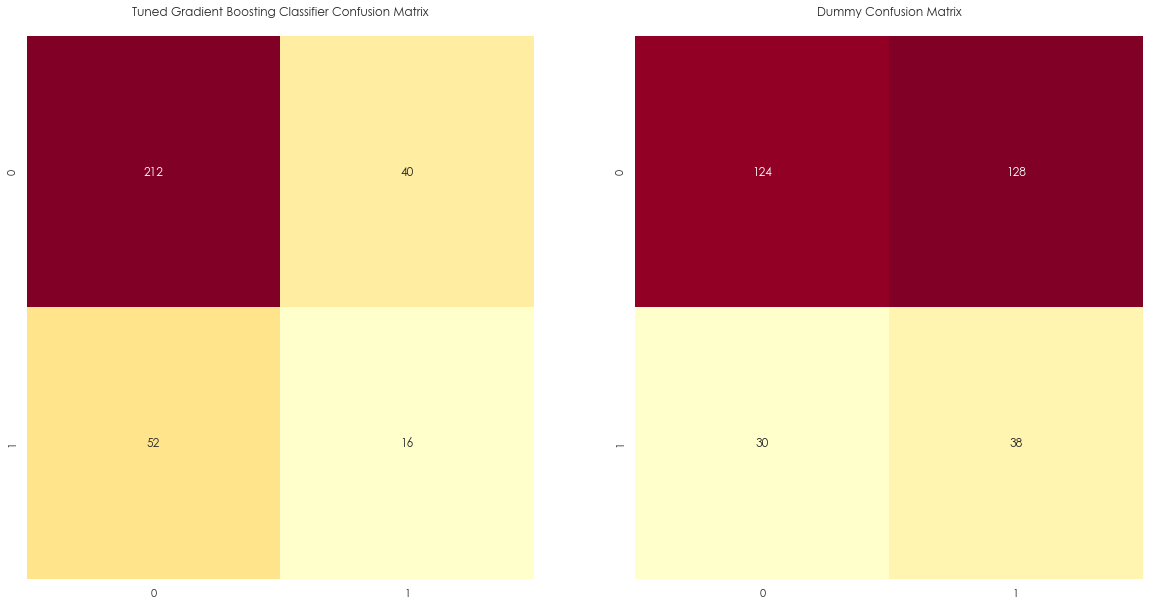

<Figure size 720x720 with 0 Axes>

In [39]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_y_pred)
dummy_cm = confusion_matrix(y_test, dummy_y_pred)

# Generate heatmaps of the confusion matrices
plt.figure(figsize=(10, 10))
sns.heatmap(gb_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax1)
sns.heatmap(dummy_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax2)

# Set titles
ax1.set_title("Tuned Gradient Boosting Classifier Confusion Matrix")
ax2.set_title("Dummy Confusion Matrix")
plt.show()

In this context, our confusion matrix works in the following way:

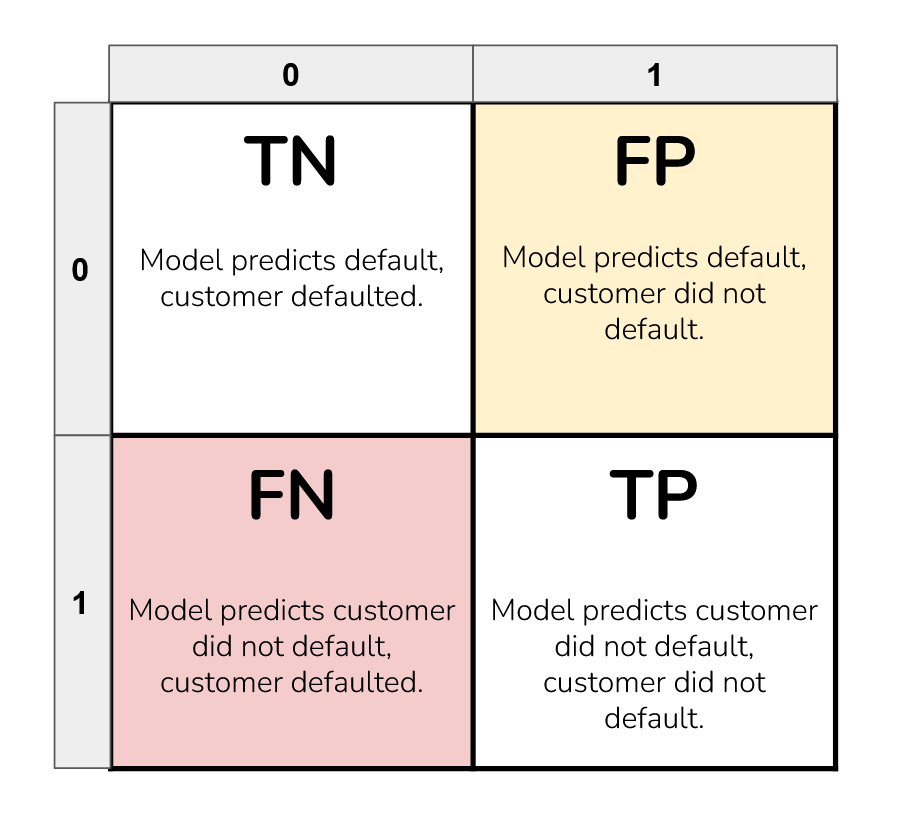

Legend:</br>
FN => False Negative</br>
TN => True Negative</br>
FP => False Positive</br>
TP => True Positive</br>

If we improve on the model furthur we want to focus on removing both FN and FP as they are both costly to the bank. 

<h5>ROC Curve</h5>

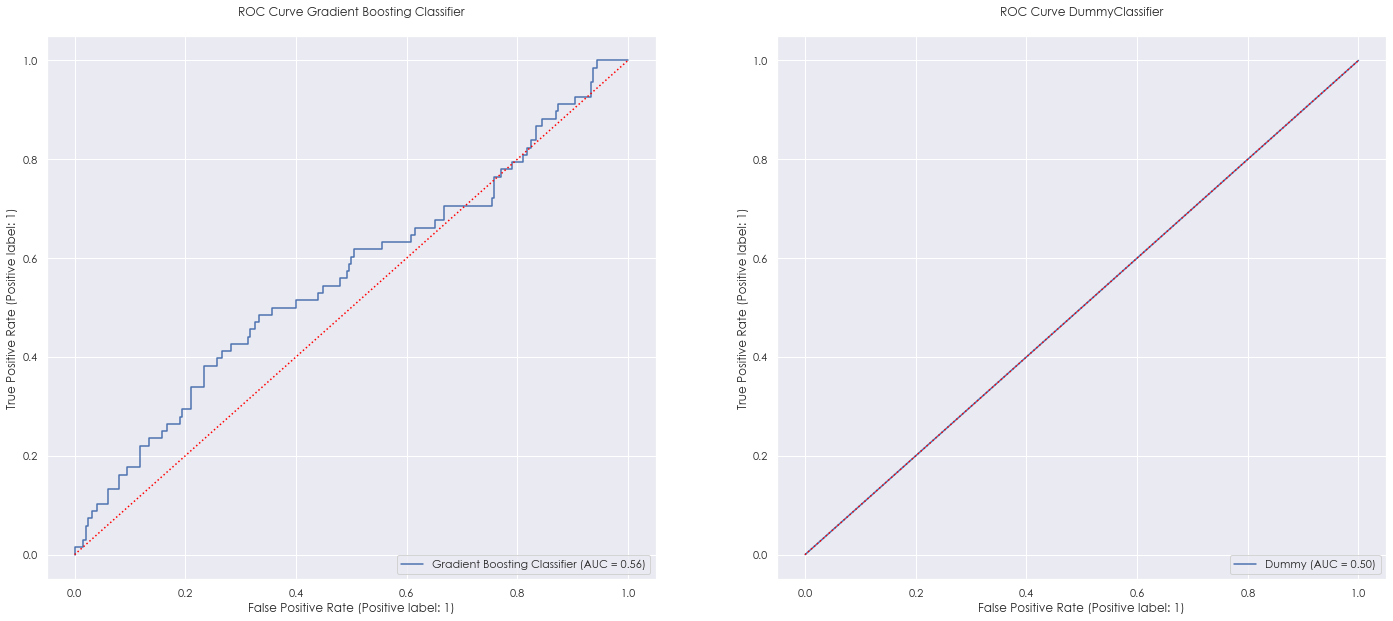

In [40]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

# Gradient Boosting Classifier
RocCurveDisplay.from_estimator(gb_search, X_test, y_test, ax=ax[0], name="Gradient Boosting Classifier")

# Dummy Classifier
RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=ax[1], name="Dummy")

# 50% line
x = np.linspace(0, 1, 2)
ax[0].plot(x, x, ":", color="red")
ax[1].plot(x, x, ":", color="red")

# Set titles
ax[0].set_title("ROC Curve Gradient Boosting Classifier")
ax[1].set_title("ROC Curve DummyClassifier")
plt.show()

<h5>Classification Report</h5>

In [41]:
# Classification Report
print(
    f"""
Gradient Boosting Classifier:
{classification_report(y_test, gb_y_pred, digits=3)}

Dummy Classifier:
{classification_report(y_test, dummy_y_pred, digits=3)}
"""
)


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0      0.803     0.841     0.822       252
           1      0.286     0.235     0.258        68

    accuracy                          0.713       320
   macro avg      0.544     0.538     0.540       320
weighted avg      0.693     0.713     0.702       320


Dummy Classifier:
              precision    recall  f1-score   support

           0      0.805     0.492     0.611       252
           1      0.229     0.559     0.325        68

    accuracy                          0.506       320
   macro avg      0.517     0.525     0.468       320
weighted avg      0.683     0.506     0.550       320




<b>Observations</b>

We can see that the model is able to perform better than the baseline model, as it is making predictions rather than the random guessing being done by the baseline dummy. This can be seen from the higher accuracy and roc_auc score, with our gradient boosting classifier having a weighted f-1 score of around 0.7, while the dummy classifier has a weighted f-1 score of around 0.5. Our model is also able to achieve a higher AUC of about 0.57, while the dummy classifier has an AUC of 0.5.

According to the confusion matrix, there are a decent amount of wrong predictions for both false negatives and false positives. The limiting factor appears to be the size of the dataset, as the model is not able to learn enough from the data to make good predictions. The model can definitely be improved by having more data, which is something that should not be too difficult as the bank can just collect more data from customers.


<hr></hr>
<h3>Feature Importance</h3>
<hr></hr>

Feature importance is a way to find out which features are more important for the model. It can be used to find out which features are more important for the model to make predictions. For our model, we will try to visualise the feature importance.

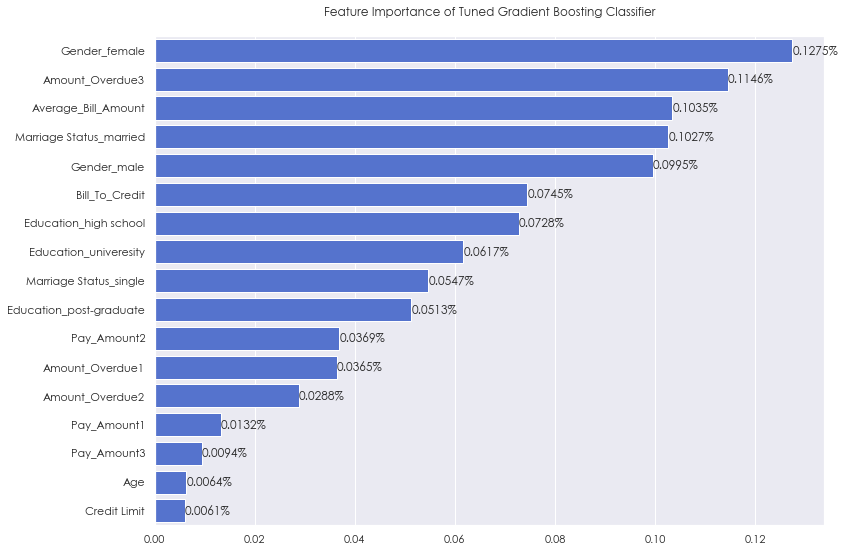

In [42]:
# Calculate the feature importances
importance = pd.Series(gb_clf[-1].feature_importances_,index=X_training.columns).sort_values(ascending=False)

# Create plot
fig, ax = plt.subplots(figsize=(12, 9))

sns.barplot(
    x=importance[importance > 0].values, 
    y=importance[importance > 0].index,  
    ax=ax,
    color="royalblue" 
)

# Format the plot
ax.set_title("Feature Importance of Tuned Gradient Boosting Classifier")
for i in ax.containers:
    ax.bar_label(i, fmt = '%.4f%%')

# Show plot
plt.show()


We can see that age and credit limit are not very important, while Gender, and Amount_Overdue3 and Average_Bill_Amount are the most important features. On the other hand, Age and Credit Limit do not seem to be very useful.

<hr></hr>
<h3>Saving Model</h3>
<hr></hr>



In [43]:
# Save the model
# pickle.dump(gb_clf, open("./Models/parta.p", "wb"))

<hr></hr>
<h3>Summary</h3>
<hr></hr>

We have successfully created a model to predict whether a customer will default payments in the next month. Although the model is somewhat accurate, it is still not good enough to be used in the real world. This is due to insufficient data being available for the model to learn from. 

However, even with more data, there will still be other limitations of the model, such as the fact that the model does not take into account the customer's income, which is a very important factor in determining whether a customer will default on payments, and other factors that is unknown to the model. The model is only able to take into account the factors that it is trained on.

Overall, the model is still a good starting point for the bank to build upon. The bank can collect more data from customers, and also add more features to the model to make it more accurate.

<hr></hr>
<h3>Learning Points</h3>
<hr></hr>

Overall, I have learnt how to use pipelines in scikit-learn to aide in a machine learning workflow. I have also managed to learn things not taught in syllabus such as SMOTE oversampling. In terms of Feature Engineering, I have learnt that knowing the context of the dataset is important and allows us to do feature engineering more effectively. Lastly, I have learnt how to solve problems independently and to think critically.